In [1]:
import datajoint as dj
import numpy as np
from matplotlib import pyplot as plt
from tifffile import imread
from IPython.display import HTML, display

In [2]:
from phase3 import nda, func, utils

Connecting stelios@at-database.ad.bcm.edu:3306


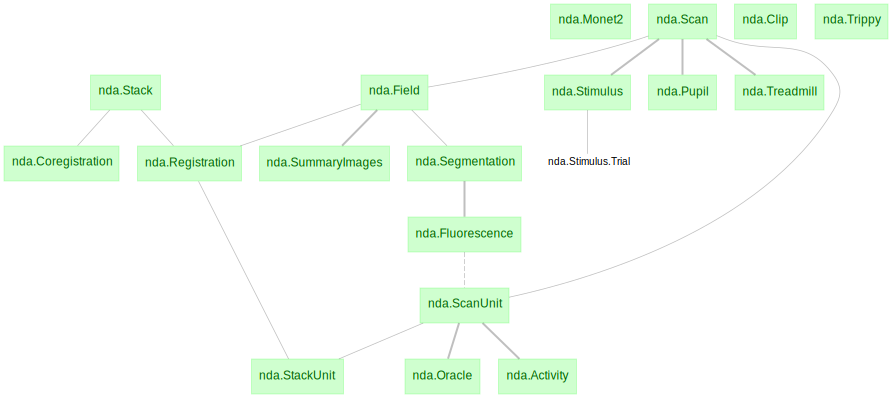

In [3]:
dj.ERD(nda)

## Basic tutorial

### scan information table

In [4]:
nda.Scan()

session Session ID,scan_idx Scan ID,filename Scan base filename uploaded to S3,nframes frames recorded,nfields number of fields,fps frames per second (Hz)
4,7,17797_4_00007,40000,8,6.3009
4,9,17797_4_00009,35112,8,6.3009
4,10,17797_4_00010,40000,8,6.3009
5,3,17797_5_00003,40000,8,6.3009
5,4,17797_5_00004,40000,8,6.3009
5,5,17797_5_00005,40000,8,6.3009
5,6,17797_5_00006,40000,8,6.3009
5,7,17797_5_00007,40000,8,6.3009
6,2,17797_6_00002,40000,8,6.3009
6,4,17797_6_00004,40000,8,6.3009


### restrict to a single scan

In [5]:
scan_key = {'session': 4, 'scan_idx': 7}

In [6]:
nda.Scan & scan_key

session Session ID,scan_idx Scan ID,filename Scan base filename uploaded to S3,nframes frames recorded,nfields number of fields,fps frames per second (Hz)
4,7,17797_4_00007,40000,8,6.3009


### restrict to a couple of scans

In [7]:
scan_keys = [{'session': 4, 'scan_idx': 7}, {'session': 5, 'scan_idx': 3}]

In [8]:
nda.Scan & scan_keys

session Session ID,scan_idx Scan ID,filename Scan base filename uploaded to S3,nframes frames recorded,nfields number of fields,fps frames per second (Hz)
4,7,17797_4_00007,40000,8,6.3009
5,3,17797_5_00003,40000,8,6.3009


### fetch some information from a single scan

In [9]:
nframes, nfields = (nda.Scan & scan_key).fetch1('nframes', 'nfields')
print(f'number of frames in this scan: {nframes}, number of fields in this scan: {nfields}')

number of frames in this scan: 40000, number of fields in this scan: 8


### fetch some information from a couple of scans

In [10]:
nframes, nfields = (nda.Scan & scan_keys).fetch('nframes', 'nfields')
print(f'number of frames in these scans: {nframes}, number of fields in these scans: {nfields}')

number of frames in these scans: [40000 40000], number of fields in these scans: [8 8]


### fetch all scans keys

In [11]:
nda.Scan.fetch('KEY')

[{'session': 4, 'scan_idx': 7},
 {'session': 4, 'scan_idx': 9},
 {'session': 4, 'scan_idx': 10},
 {'session': 5, 'scan_idx': 3},
 {'session': 5, 'scan_idx': 4},
 {'session': 5, 'scan_idx': 5},
 {'session': 5, 'scan_idx': 6},
 {'session': 5, 'scan_idx': 7},
 {'session': 6, 'scan_idx': 2},
 {'session': 6, 'scan_idx': 4},
 {'session': 6, 'scan_idx': 6},
 {'session': 6, 'scan_idx': 7},
 {'session': 7, 'scan_idx': 3},
 {'session': 7, 'scan_idx': 4},
 {'session': 7, 'scan_idx': 5},
 {'session': 8, 'scan_idx': 4},
 {'session': 8, 'scan_idx': 5},
 {'session': 8, 'scan_idx': 7},
 {'session': 8, 'scan_idx': 9},
 {'session': 9, 'scan_idx': 3},
 {'session': 9, 'scan_idx': 4},
 {'session': 9, 'scan_idx': 6}]

### field information

In [12]:
field_key = {'session':4, 'scan_idx': 7, 'field': 6}

In [13]:
nda.Field & field_key

session Session ID,scan_idx Scan ID,field Field Number,px_width field pixels per line,px_height lines per field,um_width field width (microns),um_height field height (microns),field_x field x from registration into stack (microns),field_y field y from registration into stack (microns),field_z field z from registration into stack (microns)
4,7,6,248,440,620.0,1100.0,95.0,-235.0,360.0


### masks

In [14]:
nda.Segmentation & scan_key

session Session ID,scan_idx Scan ID,field Field Number,mask_id,pixels indices into the image in column major (Fortran) order,weights weights of the mask at the indices above
4,7,1,1,=BLOB=,=BLOB=
4,7,1,2,=BLOB=,=BLOB=
4,7,1,3,=BLOB=,=BLOB=
4,7,1,4,=BLOB=,=BLOB=
4,7,1,5,=BLOB=,=BLOB=
4,7,1,6,=BLOB=,=BLOB=
4,7,1,7,=BLOB=,=BLOB=
4,7,1,8,=BLOB=,=BLOB=
4,7,1,9,=BLOB=,=BLOB=
4,7,1,10,=BLOB=,=BLOB=


### calcium fluorescence traces

In [15]:
nda.Fluorescence() & scan_key

session Session ID,scan_idx Scan ID,field Field Number,mask_id,trace
4,7,1,1,=BLOB=
4,7,1,2,=BLOB=
4,7,1,3,=BLOB=
4,7,1,4,=BLOB=
4,7,1,5,=BLOB=
4,7,1,6,=BLOB=
4,7,1,7,=BLOB=
4,7,1,8,=BLOB=
4,7,1,9,=BLOB=
4,7,1,10,=BLOB=


### single unit information

In [16]:
# unit coordinates (`um_x`, `um_y`, `um_z`) are in microns and in the original motor reference frame
# unit coordinate (`px_x` and `px_y` are the unit coordinates in image pixels)
# this table can also be used to relate `unit_id's` and `mask_id's` that are used in nda.Segmentation and nda.Fluorescence
nda.ScanUnit()

session Session ID,scan_idx Scan ID,unit_id unique per scan,field Field Number,mask_id,um_x x-coordinate of centroid in motor coordinate system,um_y y-coordinate of centroid in motor coordinate system,um_z z-coordinate of mask relative to surface of the cortex,px_x x-coordinate of centroid in the frame,px_y y-coordinate of centroid in the frame,ms_delay (ms) delay from start of frame to recording of this unit
4,7,1,1,1,-778,-771,80,7,5,0
4,7,2,1,2,-741,-766,80,22,7,0
4,7,3,1,3,-691,-776,80,41,3,0
4,7,4,1,4,-691,-766,80,42,8,0
4,7,5,1,5,-702,-767,80,37,7,0
4,7,6,1,6,-646,-764,80,60,8,0
4,7,7,1,7,-553,-770,80,97,6,0
4,7,8,1,8,-534,-758,80,105,11,0
4,7,9,1,9,-499,-760,80,119,10,0
4,7,10,1,10,-460,-768,80,134,7,0


### spike traces

In [17]:
# spike traces are associated with single units (`unit_id's`)
nda.Activity() & scan_key

session Session ID,scan_idx Scan ID,unit_id unique per scan,trace
4,7,1,=BLOB=
4,7,2,=BLOB=
4,7,3,=BLOB=
4,7,4,=BLOB=
4,7,5,=BLOB=
4,7,6,=BLOB=
4,7,7,=BLOB=
4,7,8,=BLOB=
4,7,9,=BLOB=
4,7,10,=BLOB=


### view mask info, fluorescence trace, and spike trace for the same unit

In [18]:
unit_key = {'session':4, 'scan_idx': 7, 'unit_id': 1000}

In [19]:
unit_mask_rel = nda.ScanUnit & unit_key
unit_mask_rel

session Session ID,scan_idx Scan ID,unit_id unique per scan,field Field Number,mask_id,um_x x-coordinate of centroid in motor coordinate system,um_y y-coordinate of centroid in motor coordinate system,um_z z-coordinate of mask relative to surface of the cortex,px_x x-coordinate of centroid in the frame,px_y y-coordinate of centroid in the frame,ms_delay (ms) delay from start of frame to recording of this unit
4,7,1000,2,357,388,101,80,241,354,34


In [20]:
nda.Segmentation & unit_mask_rel

session Session ID,scan_idx Scan ID,field Field Number,mask_id,pixels indices into the image in column major (Fortran) order,weights weights of the mask at the indices above
4,7,2,357,=BLOB=,=BLOB=


In [21]:
nda.Fluorescence & unit_mask_rel

session Session ID,scan_idx Scan ID,field Field Number,mask_id,trace
4,7,2,357,=BLOB=


### fetch movie

In [22]:
movie = (nda.Stimulus & scan_key).fetch1('movie')
movie.shape

(40000, 90, 160)

In [23]:
first_trial = (nda.Stimulus.Trial & scan_key & {'trial_idx': 0}).fetch1()
first_trial

{'session': 4,
 'scan_idx': 7,
 'trial_idx': 0,
 'type': 'stimulus.Clip',
 'start_idx': 55,
 'end_idx': 118,
 'condition_hash': 'JEL5/i5FccX4ykUOKaDW'}

In [24]:
trial_start_frame = movie[first_trial['start_idx']]
trial_end_frame = movie[first_trial['end_idx']]

In [25]:
first_trial['end_idx']

118

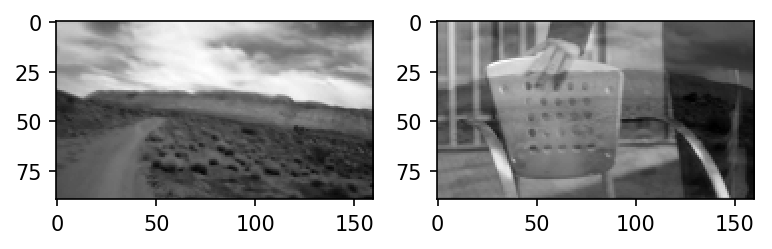

In [26]:
fig, axs = plt.subplots(1, 2, dpi=150)
axs[0].imshow(trial_start_frame, cmap='gray')
axs[1].imshow(trial_end_frame, cmap='gray')

### detailed information about trial movie clip

In [27]:
(nda.Stimulus.Trial & scan_key & {'trial_idx': 0}) * nda.Clip()

session Session ID,scan_idx Scan ID,trial_idx index of trial within stimulus,condition_hash 120-bit hash (The first 20 chars of MD5 in base64),type type of stimulus trial,start_idx start frame of trial,end_idx end frame of trial,movie_name short movie title,clip_number clip index,skip_time (s) skip to this time in the clip,cut_after (s) cut clip if it is longer than this duration
4,7,0,JEL5/i5FccX4ykUOKaDW,stimulus.Clip,55,118,sports1m,401,30.000,10.000


### detailed information about all movie clips in scan

In [28]:
(nda.Stimulus.Trial & scan_key) * nda.Clip()

session Session ID,scan_idx Scan ID,trial_idx index of trial within stimulus,condition_hash 120-bit hash (The first 20 chars of MD5 in base64),type type of stimulus trial,start_idx start frame of trial,end_idx end frame of trial,movie_name short movie title,clip_number clip index,skip_time (s) skip to this time in the clip,cut_after (s) cut clip if it is longer than this duration
4,7,0,JEL5/i5FccX4ykUOKaDW,stimulus.Clip,55,118,sports1m,401,30.000,10.000
4,7,1,AAQ1HNKGrg1cIXlMw7nz,stimulus.Clip,119,182,matrix,98,30.000,10.000
4,7,2,ksTS42zV+O0YJqa0+s4Y,stimulus.Clip,182,245,sports1m,2208,40.000,10.000
4,7,3,m5JLObtSRnbRKw1ukcSE,stimulus.Clip,246,308,sports1m,1219,10.000,10.000
4,7,4,L8Z/mji+v1WipuJe4GaL,stimulus.Clip,309,372,sports1m,1437,40.000,10.000
4,7,5,3+VHi96yg36hu1kI8ZBn,stimulus.Clip,372,435,sports1m,82,10.000,10.000
4,7,10,JOYs8Wny1GJlw6AxCVo5,stimulus.Clip,816,878,finalrun,691,20.000,10.000
4,7,11,mG4xsIyTTnaRWKW82yeD,stimulus.Clip,879,942,matrix,3,10.000,10.000
4,7,12,hnYVTt6SOC5gw43jdDOb,stimulus.Clip,942,1005,MadMax,51,30.000,10.000
4,7,13,HvUTYlGssHeK5Ub4iNLY,stimulus.Clip,1006,1069,finalrun,1317,40.000,10.000


### detailed information about all Monet2 clips in scan

In [29]:
(nda.Stimulus.Trial & scan_key) * nda.Monet2()

session Session ID,scan_idx Scan ID,trial_idx index of trial within stimulus,condition_hash 120-bit hash (The first 20 chars of MD5 in base64),type type of stimulus trial,start_idx start frame of trial,end_idx end frame of trial,fps display refresh rate,duration (s) trial duration,rng_seed random number generator seed,"blue_green_saturation 0 = grayscale, 1=blue/green",pattern_width pixel size of the resulting pattern,pattern_aspect the aspect ratio of the pattern,temp_kernel,temp_bandwidth (Hz) temporal bandwidth of the stimulus,ori_coherence 1=unoriented noise. pi/ori_coherence = bandwidth of orientations.,ori_fraction fraction of time coherent orientation is on,ori_mix mixin-coefficient of orientation biased noise,n_dirs number of directions,speed (units/s) where unit is display width,directions computed directions of motion in degrees,onsets (s) computed,movie (computed) uint8 movie
4,7,6,DKYV7TrfEl+C8nvadH+1,stimulus.Monet2,436,530,60.000,15.000,4407.0,0.000,72,1.7,hamming,4.00,2.50,1.0,1.0,16,0.2,=BLOB=,=BLOB=,=BLOB=
4,7,7,+rgSVBVRE8Ij1WNhq8ZW,stimulus.Monet2,531,625,60.000,15.000,2.0,0.000,72,1.7,hamming,4.00,2.50,1.0,1.0,16,0.2,=BLOB=,=BLOB=,=BLOB=
4,7,8,GHn0W57E+2PS+Qr5yD2r,stimulus.Monet2,626,720,60.000,15.000,8.0,0.000,72,1.7,hamming,4.00,2.50,1.0,1.0,16,0.2,=BLOB=,=BLOB=,=BLOB=
4,7,9,u0ftbdrw9UHzSHDe1o4f,stimulus.Monet2,721,815,60.000,15.000,1193.0,0.000,72,1.7,hamming,4.00,2.50,1.0,1.0,16,0.2,=BLOB=,=BLOB=,=BLOB=
4,7,88,WdUz9wrTqcT0KJgVrQeF,stimulus.Monet2,6139,6233,60.000,15.000,3935.0,0.000,72,1.7,hamming,4.00,2.50,1.0,1.0,16,0.2,=BLOB=,=BLOB=,=BLOB=
4,7,89,CJhwNJFKI+lyFVQSBCsh,stimulus.Monet2,6234,6328,60.000,15.000,4566.0,0.000,72,1.7,hamming,4.00,2.50,1.0,1.0,16,0.2,=BLOB=,=BLOB=,=BLOB=
4,7,90,SzeVJsDzE+Ceeb3XK4TT,stimulus.Monet2,6328,6423,60.000,15.000,5.0,0.000,72,1.7,hamming,4.00,2.50,1.0,1.0,16,0.2,=BLOB=,=BLOB=,=BLOB=
4,7,91,WD0uyxvusJmVxfeKu9mZ,stimulus.Monet2,6423,6518,60.000,15.000,1.0,0.000,72,1.7,hamming,4.00,2.50,1.0,1.0,16,0.2,=BLOB=,=BLOB=,=BLOB=
4,7,98,YLuStB2eXkgOS+Cescsy,stimulus.Monet2,6899,6993,60.000,15.000,9.0,0.000,72,1.7,hamming,4.00,2.50,1.0,1.0,16,0.2,=BLOB=,=BLOB=,=BLOB=
4,7,99,gnsVaYRshZj1q1gqKWom,stimulus.Monet2,6994,7088,60.000,15.000,8213.0,0.000,72,1.7,hamming,4.00,2.50,1.0,1.0,16,0.2,=BLOB=,=BLOB=,=BLOB=


### detailed information about all Trippy clips in scan

In [30]:
(nda.Stimulus.Trial & scan_key) * nda.Trippy()

session Session ID,scan_idx Scan ID,trial_idx index of trial within stimulus,condition_hash 120-bit hash (The first 20 chars of MD5 in base64),type type of stimulus trial,start_idx start frame of trial,end_idx end frame of trial,fps monitor rate,rng_seed random number generate seed,packed_phase_movie phase movie before spatial and temporal interpolation,tex_ydim (pixels) texture dimension,tex_xdim (pixels) texture dimension,duration (s) trial duration,xnodes x dimension of low-res phase movie,ynodes y dimension of low-res phase movie,up_factor spatial upscale factor,temp_freq (Hz) temporal frequency if the phase pattern were static,temp_kernel_length length of Hanning kernel used for temporal filter. Controls the rate of change of the phase pattern.,spatial_freq (cy/point) approximate max. The actual frequencies may be higher.,movie rendered movie
4,7,16,tRgm529SPpQspr220FRm,stimulus.Trippy,1196,1290,60.000,2.0,=BLOB=,90,160,15.0,12,6,24,4.0,61,0.08,=BLOB=
4,7,17,bPIYtu0PZKbei9UFlwH6,stimulus.Trippy,1291,1385,60.000,4048.0,=BLOB=,90,160,15.0,12,6,24,4.0,61,0.08,=BLOB=
4,7,18,2L0dFgMONTKcgyZJiM/T,stimulus.Trippy,1386,1480,60.000,2651.0,=BLOB=,90,160,15.0,12,6,24,4.0,61,0.08,=BLOB=
4,7,19,zcz9H/fzww6BdAJTTzoe,stimulus.Trippy,1481,1575,60.000,7.0,=BLOB=,90,160,15.0,12,6,24,4.0,61,0.08,=BLOB=
4,7,62,pbCnC+ND3OiX0SGNCm4k,stimulus.Trippy,4238,4333,60.000,9216.0,=BLOB=,90,160,15.0,12,6,24,4.0,61,0.08,=BLOB=
4,7,63,c6il6/HFHBatfpiQJdgg,stimulus.Trippy,4333,4428,60.000,1.0,=BLOB=,90,160,15.0,12,6,24,4.0,61,0.08,=BLOB=
4,7,64,WsmrwbIua3koAxhulivL,stimulus.Trippy,4428,4522,60.000,7144.0,=BLOB=,90,160,15.0,12,6,24,4.0,61,0.08,=BLOB=
4,7,65,oU8OuOIfg4zaGVH3nIGm,stimulus.Trippy,4523,4617,60.000,2078.0,=BLOB=,90,160,15.0,12,6,24,4.0,61,0.08,=BLOB=
4,7,78,GovxzB/fmPMG9nkvb5jY,stimulus.Trippy,5379,5473,60.000,9568.0,=BLOB=,90,160,15.0,12,6,24,4.0,61,0.08,=BLOB=
4,7,79,U6NqQRL+v/N/9xnLSH2y,stimulus.Trippy,5474,5568,60.000,10.0,=BLOB=,90,160,15.0,12,6,24,4.0,61,0.08,=BLOB=


## Field to Stack registration

### Stack information

In [31]:
nda.Stack()

stack_session session index for the mouse,stack_idx id of the stack,z (um) center of volume in the motor coordinate system (cortex is at 0),y (um) center of volume in the motor coordinate system,x (um) center of volume in the motor coordinate system,px_depth number of slices,px_height lines per frame,px_width pixels per line,um_depth depth in microns,um_height height in microns,um_width width in microns,surf_z (um) depth of first slice - half a z step (cortex is at z=0)
9,19,314.0,-173.688,-236.91,335,661,706,670.0,1322.0,1412.0,-21.0


In [32]:
# affine matrix parameters for each field registered into the stack
nda.Registration()

stack_session session index for the mouse,stack_idx id of the stack,session Session ID,scan_idx Scan ID,field Field Number,"a11 (um) element in row 1, column 1 of the affine matrix","a21 (um) element in row 2, column 1 of the affine matrix","a31 (um) element in row 3, column 1 of the affine matrix","a12 (um) element in row 1, column 2 of the affine matrix","a22 (um) element in row 2, column 2 of the affine matrix","a32 (um) element in row 3, column 2 of the affine matrix","reg_x (um) element in row 1, column 4 of the affine matrix","reg_y (um) element in row 2, column 4 of the affine matrix","reg_z (um) element in row 3, column 4 of the affine matrix",score cross-correlation score (-1 to 1),reg_field extracted field from the stack in the specified position
9,19,4,7,1,1.01772,-0.0145225,0.0018944,-0.0280634,0.986519,-0.0285501,-454.09,-256.776,97.6145,0.540091,=BLOB=
9,19,4,7,2,1.00623,-0.00712693,-0.0090871,-0.0311762,0.99257,0.00307296,96.5137,-274.888,84.0315,0.49785,=BLOB=
9,19,4,7,3,1.01637,-0.00539311,-0.0049751,-0.0194279,0.989661,-0.00657425,-465.618,-261.087,227.344,0.636321,=BLOB=
9,19,4,7,4,1.00784,-0.00337667,-0.017749,-0.0231734,0.994399,0.00351191,94.7115,-276.434,217.736,0.646221,=BLOB=
9,19,4,7,5,1.01731,-0.000610119,-0.00490801,-0.0132803,0.995063,-0.000869276,-477.589,-264.193,359.938,0.655698,=BLOB=
9,19,4,7,6,1.00972,-0.00263978,-0.0201341,-0.0185305,0.998133,0.0030333,92.7121,-277.918,350.91,0.682749,=BLOB=
9,19,4,7,7,1.01658,0.00165483,-0.00715467,-0.00885853,0.999801,0.00355401,-491.393,-266.721,494.216,0.633,=BLOB=
9,19,4,7,8,1.01249,-0.00176372,-0.00578421,-0.0145943,1.00236,0.00389002,89.8318,-279.692,484.589,0.621987,=BLOB=
9,19,4,9,1,1.01886,-0.0093474,0.00555381,-0.0314774,0.987765,-0.0169226,-452.983,-260.63,101.874,0.540398,=BLOB=
9,19,4,9,2,1.00472,-0.00820378,-0.0177963,-0.0355584,0.995649,0.00168896,97.9598,-278.913,93.2669,0.501015,=BLOB=


### get registered grid of field in stack coordinates

In [34]:
grid = func.get_grid(field_key) # fetch registered grid 

stack_x, stack_y, stack_z = nda.Stack.fetch1('x', 'y', 'z') # get stack center

grid = grid - np.array([stack_x, stack_y, stack_z]) # subtract stack center from grid

grid.shape

(1100, 620, 3)

### get field grid in EM coordinates

In [35]:
# transform_id 1 - 4 are for phase2
# transform_id 5 - 8 are for phase3
# transform_id 1, 3, 5, 7 go from 2P --> EM
# transform_id 2, 4, 6, 8 go from EM --> 2P
# transform_type "spline" is slightly more accurate but is slower
# transform_type "linear" is faster 
nda.Coregistration()

stack_session session index for the mouse,stack_idx id of the stack,transform_id id of the transform,version coordinate framework,"direction direction of the transform (EMTP: EM -> 2P, TPEM: 2P -> EM)",transform_type linear (more rigid) or spline (more nonrigid),transform_args parameters of the transform,transform_solution transform solution
9,19,1,phase2,2PEM,spline,=BLOB=,=BLOB=
9,19,2,phase2,EM2P,spline,=BLOB=,=BLOB=
9,19,3,phase2,2PEM,linear,=BLOB=,=BLOB=
9,19,4,phase2,EM2P,linear,=BLOB=,=BLOB=
9,19,5,phase3,2PEM,spline,=BLOB=,=BLOB=
9,19,6,phase3,EM2P,spline,=BLOB=,=BLOB=
9,19,7,phase3,2PEM,linear,=BLOB=,=BLOB=
9,19,8,phase3,EM2P,linear,=BLOB=,=BLOB=


In [36]:
# fetch coregistration
transform_params = func.fetch_coreg(transform_id=5) # phase3 "spline" transform
# transform_params = func.fetch_coreg(transform_id=7) # phase3 "linear" transform

In [37]:
# fetch grid in EM coordinates
em_grid = func.field_to_EM_grid(field_key, **transform_params)
em_grid.shape

(1100, 620, 3)

In [38]:
# alternatively transform_id can be passed directly to field_to_EM_grid and the coregistration will be fetched inside the function
em_grid = func.field_to_EM_grid(field_key, transform_id=5)
em_grid.shape

(1100, 620, 3)

In [39]:
# visualize field grid in Neuroglancer

em_grid_annotations = utils.coordinate(em_grid[::25,::25]) # reshape grid to n x 3 and sparsely sample
ng_link = utils.add_point_annotations(func.phase3_ng_link, 'grid', em_grid_annotations, voxelsize=[4, 4, 40], color='#f1ff00') # add grid points as annotations in Neuroglancer
display(HTML(f'<a href="{ng_link}">Neuroglancer</a>'))

### plot field images

In [40]:
from itertools import product

In [41]:
field_key = {'session': 6, 'scan_idx': 7, 'field': 6}

In [42]:
summary_images = ['average', 'correlation', 'l6norm', 'average*correlation', 'l6norm**2']
enhance_options = [True, False]
kwords = [{'summary_image': i, 'enhance': e} for i, e in  product(summary_images, enhance_options)]
image_dict = {tuple(k.values()): func.get_field_image(field_key, **k) for k in kwords}

/usr/lib/python3/dist-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


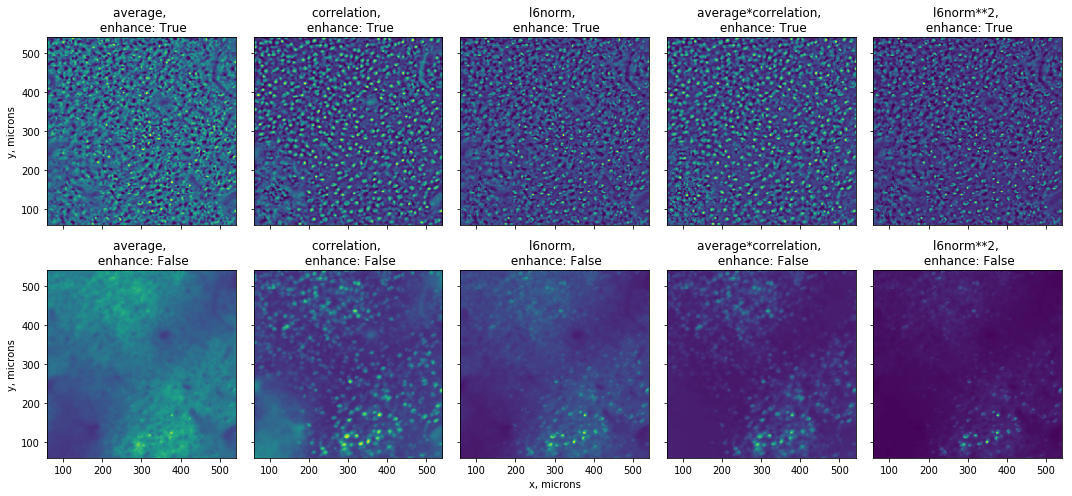

In [43]:
fig, axs = plt.subplots(2, 5, figsize=(15, 7), sharex=True, sharey=True)
[ax.imshow(image_dict[tuple(k.values())])  for ax, k in zip(axs.T.ravel(), kwords)]
[ax.set_title(f'{tuple(k.values())[0]}, \n enhance: {tuple(k.values())[1]}')  for ax, k in zip(axs.T.ravel(), kwords)]
[ax.set_xlim(100, 500) for ax in axs.T.ravel()]
[ax.set_ylim(100, 500) for ax in axs.T.ravel()]
[ax.set_aspect('equal') for ax in axs.T.ravel()];

axs[1,2].set_xlabel('x, microns')
axs[0,0].set_ylabel('y, microns')
axs[1,0].set_ylabel('y, microns')


fig.set_tight_layout('tight')

### plot scan field image and stack images extracted from registered field

In [47]:
# change paths to stacks to match your directories
cell_stack = imread('/content/dev-notebooks/data/stacks/sharpened_stack.tif') 
vessel_stack = imread('/content/dev-notebooks/data/stacks/sharpened_vessels.tif') 

In [48]:
scan_field = func.get_field_image(field_key, summary_image='average*correlation', enhance=True)
cell_stack_field = func.get_stack_field_image(field_key, cell_stack)
vessel_stack_field = func.get_stack_field_image(field_key, vessel_stack)

/usr/lib/python3/dist-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


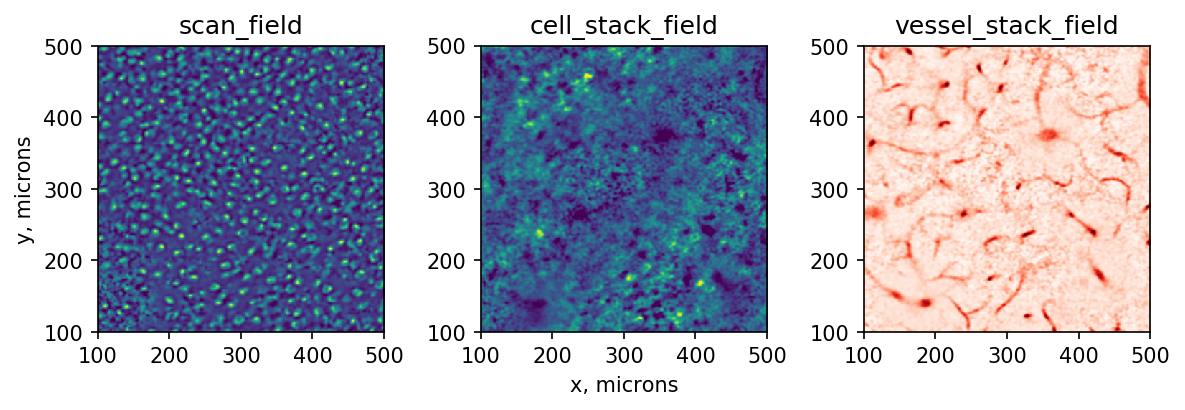

In [49]:
fig, axs = plt.subplots(1,3, figsize=(8,3), dpi=150)
axs[0].imshow(scan_field)
axs[1].imshow(cell_stack_field)
axs[2].imshow(vessel_stack_field, cmap='Reds')
axs[0].set_title('scan_field')
axs[1].set_title('cell_stack_field')
axs[2].set_title('vessel_stack_field')
[ax.set_xlim(100, 500) for ax in axs.T.ravel()]
[ax.set_ylim(100, 500) for ax in axs.T.ravel()]
[ax.set_aspect('equal') for ax in axs.T.ravel()];
axs[1].set_xlabel('x, microns')
axs[0].set_ylabel('y, microns')

fig.set_tight_layout('tight')

### transform cell coordinates from stack to EM coordinates

In [50]:
cell_xyz = np.stack((nda.StackUnit() & field_key).fetch('np_x', 'np_y', 'np_z'), -1) # fetch stack unit x, y, z in numpy reference frame

In [51]:
em_coords = func.coreg_transform(cell_xyz, transform_id=7)

In [52]:
ng_link = utils.add_point_annotations(func.phase3_ng_link, 'units', em_coords, voxelsize=[4, 4, 40], color='#f1ff00') # add unit coordinate as annotation in Neuroglancer
display(HTML(f'<a href="{ng_link}">Neuroglancer</a>'))